# TensorFlow Tutorial - 4. MLP ( Multi Layer Perceptron )

본 문서는 TensorFlow 를 사용하여 Deep Learning을 구현하기 위한 기초적인 실습 자료이다.

The code and comments are written by Dong-Hyun Kwak <imcomking@gmail.com><br>
Upgraed to Tensorflow v1.9 by NamJungGu <nowage@gmail.com> 

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.





In [1]:
import tensorflow as tf
MINIBATCH_SIZE = 100
NUM_STEPS = 1000

(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()


In [13]:
print(f'''
test_x.shape = {test_x.shape} 
test_y.shape = {test_y.shape} 
test_y[0]    = {test_y[0]} 
'''
)


print(x)
for i in range(28):
    s=''
    for j in range(28):
        if test_x[0][i][j] > 0.9 :
            s+='O'
        else:
            s+=' '    
    print(s)
    


test_x.shape = (10000, 28, 28) 
test_y.shape = (10000,) 
test_y[0]    = 7 

aa
                            
                            
                            
                            
                            
                            
                            
      OOOOOO                
      OOOOOOOOOOOOOOOO      
      OOOOOOOOOOOOOOOO      
           OOOOOOOOOOO      
                  OOOO      
                 OOOO       
                 OOOO       
                OOOO        
                OOOO        
               OOOO         
               OOO          
              OOOO          
             OOOO           
            OOOOO           
            OOOO            
           OOOOO            
           OOOO             
          OOOOO             
          OOOOO             
          OOOO              
                            


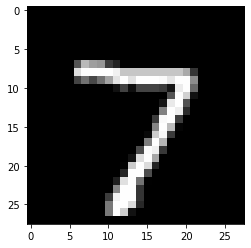

In [14]:
import matplotlib.pyplot as plt
plt.gray()
plt.imshow(test_x[0].reshape(28, 28))    

In [15]:
# Train set
# Image
train_x = train_x.reshape([train_x.shape[0], -1])
train_x = train_x.astype('float32') / 255
# Label
train_y = tf.keras.utils.to_categorical(train_y, num_classes=10)
# Test set
# Image
test_x = test_x.reshape([test_x.shape[0], -1])
test_x = test_x.astype('float32') / 255
# Label
test_y = tf.keras.utils.to_categorical(test_y, num_classes=10)

In [16]:
buffer_size = train_x.shape[0] + test_x.shape[0]
dataset = tf.data.Dataset.from_tensor_slices(({"image": train_x}, train_y))
dataset = dataset.shuffle(buffer_size).repeat().batch(MINIBATCH_SIZE)
iterator = dataset.make_one_shot_iterator()
next_batch = iterator.get_next()



Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


In [17]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
y_pred = tf.matmul(x ,W)
y_true = tf.placeholder(tf.float32, [None, 10])


In [18]:

# Cost(Loss) Function
cross_entropy = tf.reduce_mean(
                  tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_pred, labels=y_true))

# Gradient Step(Optimze)
gd_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cross_entropy)

correct_mask = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_mask, tf.float32))

In [19]:
with tf.Session() as sess:
  # 학습
  sess.run(tf.global_variables_initializer())

  for step in range(NUM_STEPS):
      batch_xs, batch_ys = sess.run(next_batch)
      sess.run(gd_step, feed_dict={x: batch_xs['image'], y_true: batch_ys})

      if(step + 1) % 100 == 0:
          print(step+1, '|', sess.run(cross_entropy, feed_dict={x: batch_xs['image'], y_true: batch_ys}))

  # 테스트
  ans = sess.run(accuracy, feed_dict={x: test_x,
                                     y_true: test_y})

print("Accuracy: {:.2f}%".format(ans*100))



100 | 0.4147769
200 | 0.29312602
300 | 0.41927665
400 | 0.26992378
500 | 0.17326233
600 | 0.17850976
700 | 0.35745946
800 | 0.1947348
900 | 0.24961041
1000 | 0.13932207
Accuracy: 92.11%
